In [144]:
"""DBSCAN Clustering"""
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import warnings
x, y = make_moons(n_samples=1000, noise=0.05, random_state=7)

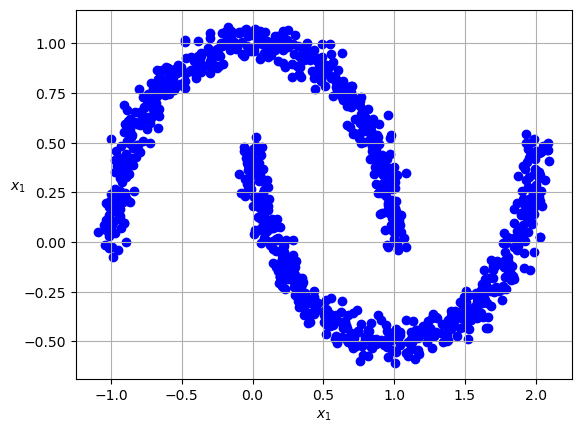

In [145]:
plt.scatter(x[:,0],x[:,1],color='b')
plt.xlabel("$x_1$")
plt.ylabel("$x_1$",rotation=0)
plt.grid()
plt.show()

In [146]:
dbscan = DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=0.05)

In [147]:
"""instances with cluster index equal to –1, are considered
as anomalies """
dbscan.labels_.shape

(1000,)

In [148]:
dbscan.core_sample_indices_[10:15]

array([12, 13, 14, 17, 18])

In [149]:
dbscan.components_

array([[ 1.1687481 , -0.48110699],
       [-0.48883432,  0.85528057],
       [-0.14304365,  1.00550199],
       ...,
       [ 0.05742751,  0.43870037],
       [ 0.07644203,  0.22938389],
       [ 0.39292492,  0.94943869]])

In [150]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=50)
knn_clf.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [151]:
x_topredict = np.array([[-0.75, 0], [0, 0.75], [-1, 0.3], [3, 2]])
knn_clf.predict(x_topredict)

array([3, 1, 3, 0])

In [152]:
knn_clf.predict_proba(x_topredict)

array([[0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.86, 0.  , 0.  , 0.14, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.72, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.  ]])

/var/folders/gf/zqm9r53s605cjy75qc87l87r0000gn/T/ipykernel_46864/1872607929.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


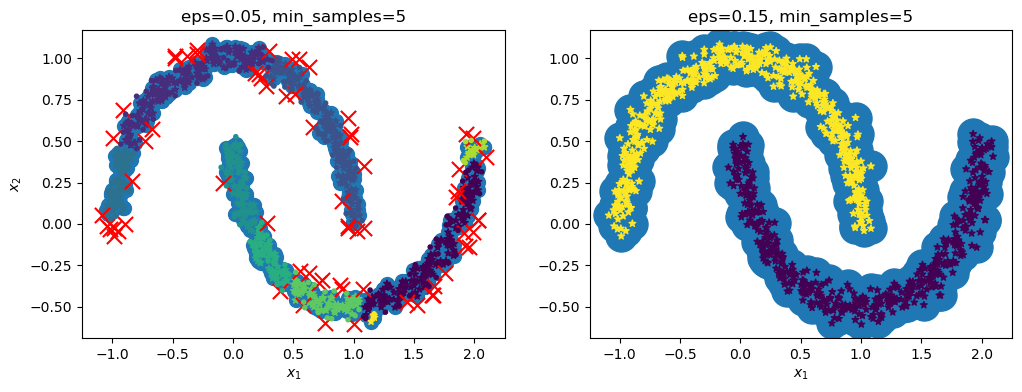

In [153]:
def plot_dbscan(dbscan,x,size,with_xlabels=True,with_ylabels=True):
    anomalies_mask = (dbscan.labels_ == -1)
    core_mask = np.zeros_like(dbscan.labels_,dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    ## not anomalies and not core
    not_core_mask = ~(core_mask | anomalies_mask) 
    anomalies = x[anomalies_mask]
    not_cores = x[not_core_mask]
    plt.scatter(
    dbscan.components_[:,0],dbscan.components_[:,1],
    marker='o',s=size,cmap="Paired")
    plt.scatter(
        dbscan.components_[:,0],dbscan.components_[:,1],
    marker='*',s=25,c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                    c="r", marker="x", s=120)
    plt.scatter(not_cores[:, 0], not_cores[:, 1],
                    c=dbscan.labels_[not_core_mask], marker=".")
    if with_xlabels:
        plt.xlabel("$x_1$")
    if with_ylabels:
        plt.ylabel("$x_2$")
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
       
dbscan2 = DBSCAN(eps=0.15,min_samples=5)
dbscan2.fit(x)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(121)
plot_dbscan(dbscan,x,size=100)
plt.subplot(122)
plot_dbscan(dbscan2,x,size=500,with_ylabels=False)
plt.show()

In [154]:
"""Conclusion: Clustering is shown above. As you can see, Left plot with
eps=0.05, quite close, I  identified a lot of anomalies(red crosses),
and 7 different clusters. If I widen each instance’s neighborhood by 
increasing eps to 0.15, I get the clustering on the right, 
which looks perfect!!!"""

'Conclusion: Clustering is shown above. As you can see, Left plot with\neps=0.05, quite close, I  identified a lot of anomalies(red crosses),\nand 7 different clusters. If I widen each instance’s neighborhood by \nincreasing eps to 0.15, I get the clustering on the right, \nwhich looks perfect!!!'